In [1]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from datasets import load_dataset
from datasets import Dataset, DatasetDict

In [2]:
ds = load_dataset("imagefolder", data_dir = "./images/")
ds = ds['train']

Resolving data files:   0%|          | 0/101000 [00:00<?, ?it/s]

In [3]:
data = ds.train_test_split(test_size=0.15)

In [4]:
test = {}
image = []
label = []
with open('./meta/meta/test.txt', 'r') as file:

    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        image.append(after)
        label.append(before)
    
    test["image"] = image
    test["label"] = label

test

{'image': ['./images/apple_pie/1011328.jpg',
  './images/apple_pie/101251.jpg',
  './images/apple_pie/1034399.jpg',
  './images/apple_pie/103801.jpg',
  './images/apple_pie/1038694.jpg',
  './images/apple_pie/1047447.jpg',
  './images/apple_pie/1068632.jpg',
  './images/apple_pie/110043.jpg',
  './images/apple_pie/1106961.jpg',
  './images/apple_pie/1113017.jpg',
  './images/apple_pie/116705.jpg',
  './images/apple_pie/1167170.jpg',
  './images/apple_pie/1174330.jpg',
  './images/apple_pie/1180600.jpg',
  './images/apple_pie/1235282.jpg',
  './images/apple_pie/1269202.jpg',
  './images/apple_pie/1272958.jpg',
  './images/apple_pie/1284428.jpg',
  './images/apple_pie/1295996.jpg',
  './images/apple_pie/129668.jpg',
  './images/apple_pie/1321400.jpg',
  './images/apple_pie/1327259.jpg',
  './images/apple_pie/1332030.jpg',
  './images/apple_pie/1364847.jpg',
  './images/apple_pie/1375404.jpg',
  './images/apple_pie/1398774.jpg',
  './images/apple_pie/1420999.jpg',
  './images/apple_pie/14

In [5]:
train = {}
image = []
label = []
with open('./meta/meta/train.txt', 'r') as file:

    for line in file:
        text = line.strip()
        before, after = text.split("/")
        after = "./images/" + before + "/" + after + ".jpg"
        image.append(after)
        label.append(before)
    
    train["image"] = image
    train["label"] = label

train

{'image': ['./images/apple_pie/1005649.jpg',
  './images/apple_pie/1014775.jpg',
  './images/apple_pie/1026328.jpg',
  './images/apple_pie/1028787.jpg',
  './images/apple_pie/1043283.jpg',
  './images/apple_pie/1050519.jpg',
  './images/apple_pie/1057749.jpg',
  './images/apple_pie/1057810.jpg',
  './images/apple_pie/1072416.jpg',
  './images/apple_pie/1074856.jpg',
  './images/apple_pie/1074942.jpg',
  './images/apple_pie/1076891.jpg',
  './images/apple_pie/1077610.jpg',
  './images/apple_pie/1077964.jpg',
  './images/apple_pie/1088809.jpg',
  './images/apple_pie/1097378.jpg',
  './images/apple_pie/1103795.jpg',
  './images/apple_pie/1109597.jpg',
  './images/apple_pie/1111062.jpg',
  './images/apple_pie/1112300.jpg',
  './images/apple_pie/1112838.jpg',
  './images/apple_pie/1121884.jpg',
  './images/apple_pie/112378.jpg',
  './images/apple_pie/1133267.jpg',
  './images/apple_pie/1142597.jpg',
  './images/apple_pie/1147371.jpg',
  './images/apple_pie/1154371.jpg',
  './images/apple_pi

In [6]:
train_dataset = Dataset.from_dict(train)
test_dataset = Dataset.from_dict(test)
dataset_dict = DatasetDict({"train": train_dataset, "test": test_dataset})
train_split = dataset_dict["train"]
test_split = dataset_dict["test"]
dataset_dict

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 75750
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 25250
    })
})

In [7]:
ex = data['train'][400]
ex

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=512x384 at 0x1F36D8648E0>,
 'label': 36}

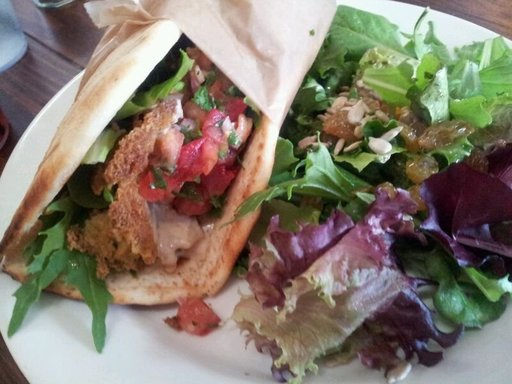

In [8]:
image = ex['image']
image

In [9]:
labels = data['train'].features['label']
labels

ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheese_plate', 'cheesecake', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus', 'ice_cream', 'lasagna', 'lobster_bisque', 'lobster_roll_sandwich', 'macaroni_and_cheese', 'mac

In [10]:
labels.int2str(ex['label'])

'falafel'

In [11]:
from datasets import load_metric

metric = load_metric("accuracy")

C:\Users\ferdi\AppData\Local\Temp\ipykernel_12960\1780215247.py:3: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [12]:
labels = data["train"].features["label"].names
label2id, id2label = dict(), dict()
for i, label in enumerate(labels):
    label2id[label] = i
    id2label[i] = label

In [13]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

c:\Users\ferdi\AppData\Local\Programs\Python\Python310\lib\site-packages\transformers\models\vit\feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [14]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
train_transforms = Compose(
        [
            RandomResizedCrop(feature_extractor.size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )
val_transforms = Compose(
        [
            Resize((224,224)),
            CenterCrop(feature_extractor.size),
            ToTensor(),
            normalize,
        ]
    )

def preprocess_train(example_batch):
    """Apply train_transforms across a batch."""
    example_batch["pixel_values"] = [
        train_transforms(image.convert("RGB")) for image in example_batch["image"]
    ]
    return example_batch

def preprocess_val(example_batch):
    """Apply val_transforms across a batch."""
    example_batch["pixel_values"] = [val_transforms(image.convert("RGB")) for image in example_batch["image"]]
    return example_batch

In [15]:
# split up training into training + validation
train_ds = data['train']
val_ds = data['test']

In [16]:
train_ds.set_transform(preprocess_train)
val_ds.set_transform(preprocess_val)

In [17]:
from transformers import ViTForImageClassification
model_name_or_path = 'google/vit-base-patch16-224-in21k'
model = ViTForImageClassification.from_pretrained(
    model_name_or_path, 
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)}
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [18]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    'food-recognition',
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=4,
  save_steps=100,
  eval_steps=100,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=True,
  report_to='tensorboard',
  load_best_model_at_end=True,
  hub_strategy="end"
)

In [19]:
import numpy as np

# the compute_metrics function takes a Named Tuple as input:
# predictions, which are the logits of the model as Numpy arrays,
# and label_ids, which are the ground-truth labels as Numpy arrays.
def compute_metrics(eval_pred):
    """Computes accuracy on a batch of predictions"""
    predictions = np.argmax(eval_pred.predictions, axis=1)
    return metric.compute(predictions=predictions, references=eval_pred.label_ids)

In [20]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['label'] for x in batch])
    }

In [21]:
from transformers import Trainer
trainer = Trainer(
    model,
    training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=feature_extractor,
    compute_metrics=compute_metrics,
    data_collator=collate_fn,
)

In [22]:
train_results = trainer.train()
# rest is optional but nice to have
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

  0%|          | 0/21464 [00:00<?, ?it/s]

KeyError: 1